In [1]:
# Importing the standard Python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Actor Specific Problem Formulations

In [2]:
# Loading in the necessary modules for EMA workbench and functions
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport

from problem_formulation import sum_over

In [3]:
# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

# Loading in all the 17 objectives via predefined problem formulation 3
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    dike_model = get_model_for_problem_formulation(3)

[MainProcess/INFO] model initialized


In [4]:
# Replicate the uncertainties
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [5]:
# Replicate the levers
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [6]:
# Replicate the objectives
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage')
ScalarOutcome('A.1_Dike Investment Costs')
ScalarOutcome('A.1_Expected Number of Deaths')
ScalarOutcome('A.2_Expected Annual Damage')
ScalarOutcome('A.2_Dike Investment Costs')
ScalarOutcome('A.2_Expected Number of Deaths')
ScalarOutcome('A.3_Expected Annual Damage')
ScalarOutcome('A.3_Dike Investment Costs')
ScalarOutcome('A.3_Expected Number of Deaths')
ScalarOutcome('A.4_Expected Annual Damage')
ScalarOutcome('A.4_Dike Investment Costs')
ScalarOutcome('A.4_Expected Number of Deaths')
ScalarOutcome('A.5_Expected Annual Damage')
ScalarOutcome('A.5_Dike Investment Costs')
ScalarOutcome('A.5_Expected Number of Deaths')
ScalarOutcome('RfR Total Costs')
ScalarOutcome('Expected Evacuation Costs')


In [7]:
# Import ScalarOutcome from ema_workbench to define the actor specific outcomes of interest in the next function
from ema_workbench import ScalarOutcome

In [8]:
# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor):
   
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE
    
    model.uncertainties = uncertainties
    model.levers = levers

    if problem_formulation_actor == 4: # RWS
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage',
                            variable_name=['{}_Expected Annual Damage'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction),

            ScalarOutcome('Total Investment Costs',
                            variable_name=['{}_Dike Investment Costs'.format(dike)
                                                for dike in function.dikelist] + ['RfR Total Costs'
                                                                                ] + ['Expected Evacuation Costs'],
                            function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths',
                            variable_name=['{}_Expected Number of Deaths'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction)] 
    
    elif problem_formulation_actor == 5: # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A1-4',
                            variable_name=['A.1_Expected Annual Damage' ,'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=sum_over, kind=direction),

            ScalarOutcome('Investment Costs A1-4',
                            variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths in A1-4',
                            variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=sum_over, kind=direction)]
    
    elif problem_formulation_actor == 6: # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A5', variable_name=['A.5_Expected Annual Damage'], kind=direction),

            ScalarOutcome('Investment Costs A5', variable_name=['A.5_Dike Investment Costs'], kind=direction),

            ScalarOutcome('Expected Number of Deaths in A5', variable_name=['A.5_Expected Number of Deaths'], kind=direction)]
    
    else:
        raise TypeError('unknown identifier')
    return model

In [9]:
# Loading in the right problem formulation, in this case for Gelderland
model = problem_formulation_actor(5)

[MainProcess/INFO] model initialized


In [10]:
# Check the levers
for outcome in model.levers:
    print(repr(outcome))

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [11]:
# Check the uncertainties
for outcome in model.uncertainties:
    print(repr(outcome))

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [12]:
# Check is the right objectives are loaded in
for outcome in model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage A1-4', variable_name=['A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=<function sum_over at 0x0000018BCC346840>)
ScalarOutcome('Investment Costs A1-4', variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=<function sum_over at 0x0000018BCC346840>)
ScalarOutcome('Expected Number of Deaths in A1-4', variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=<function sum_over at 0x0000018BCC346840>)


# MORDM Reference Case

In [13]:
# Reference case specification
reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                        'discount rate': 3.5,
                        'ID flood wave shape': 4}


refcase_scen = {}

for key in dike_model.uncertainties:
    name_split = key.name.split('_')
    if len(name_split) == 1:

        refcase_scen.update({key.name: reference_values[key.name]})
    else:
        refcase_scen.update({key.name: reference_values[name_split[1]]})
            
ref_scenario = Scenario('reference', **refcase_scen)

In [14]:
# Loading in the right packages for running the optimization
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)

In [15]:
# Searching for candidate solutions, by variating the definitions of the levers for the reference scenario
convergence_metrics = {EpsilonProgress()}

with MultiprocessingEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=10000, searchover='levers',
                                 convergence=convergence_metrics,
                                 epsilons=[0.05,]*len(model.outcomes), reference=ref_scenario)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 1: 100/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 2: 200/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 3: 299/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies *

[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 30: 2958/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 93 policies * 1 model(s) = 93 experiments
[MainProcess/INFO] 31 cases completed
[MainProcess/INFO] 62 cases completed
[MainProcess/INFO] 93 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 31: 3051/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 32: 3148/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] 

[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 59: 5773/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 60: 5870/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 61: 5967/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 62: 6066/10000 nfe
[MainP

[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 88: 8604/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 89: 8703/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 90: 8802/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 91: 8899/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 

In [16]:
# Specifying the results for the reference case scenario
ref_results = results
ref_convergence = convergence

C:\Users\LocalAdmin\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\LocalAdmin\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


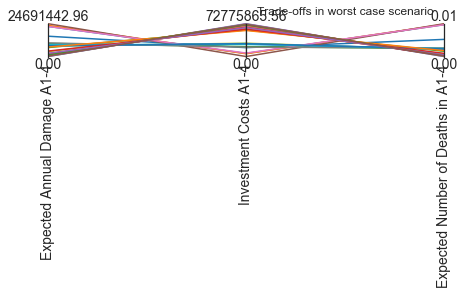

In [17]:
# Plot the trade-offs between the outcomes of interest
from ema_workbench.analysis import parcoords

ref_data = ref_results.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(ref_data)
ref_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(ref_limits)
paraxes.plot(ref_data)
plt.title('Trade-offs in worst case scenario')

# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# When only 1 solution is proposed, this will result in a flat line

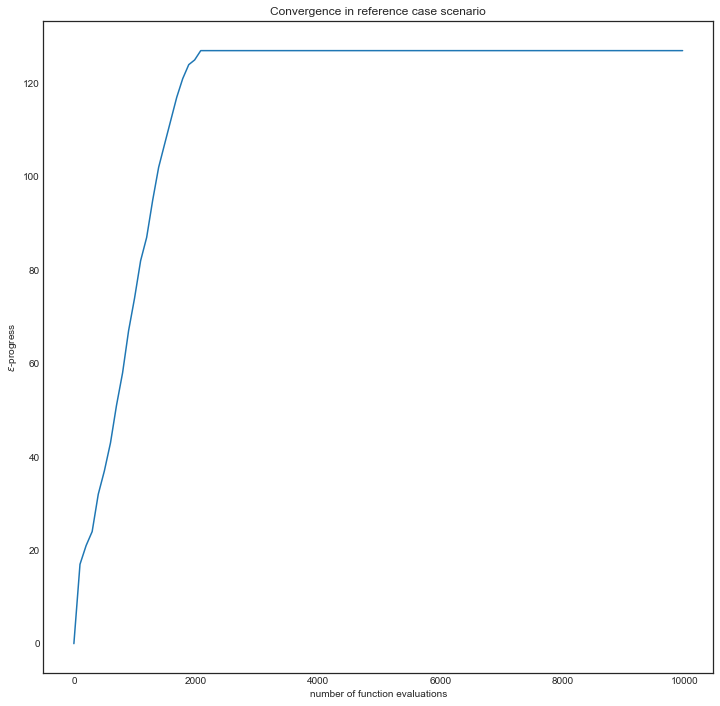

In [18]:
# By plotting whether the results are converged nicely, it can be checked whether more nfe's are necessary to run
import matplotlib.pyplot as plt
plt.plot(ref_convergence.nfe,ref_convergence.epsilon_progress)
plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.title('Convergence in reference case scenario')
plt.show()

In [19]:
# Complete results dataframe
ref_results

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat,Expected Annual Damage A1-4,Investment Costs A1-4,Expected Number of Deaths in A1-4
0,0,0,0,2,1,1,0,1,1,1,3,2.269554e+07,6.855555e+06,0.005423
1,0,0,0,1,6,1,1,1,1,1,3,2.344318e+07,6.111950e+06,0.005487
2,0,1,3,0,3,1,0,1,1,1,3,6.742000e+06,5.885921e+07,0.000889
3,0,3,2,3,5,1,0,1,1,1,3,3.540688e+05,7.162518e+07,0.000103
4,0,3,3,3,6,1,1,1,1,0,0,0.000000e+00,7.277587e+07,0.000000
5,0,2,3,2,10,1,1,1,1,1,4,1.713404e+06,6.876890e+07,0.000264
6,0,2,2,3,6,1,0,1,1,1,3,2.011713e+06,6.840550e+07,0.000362
7,0,3,3,2,5,1,0,1,1,1,3,5.575981e+04,7.198858e+07,0.000005
8,0,0,3,3,8,1,0,1,1,0,3,7.807815e+06,2.952062e+07,0.001187
9,0,0,3,2,1,1,1,1,1,1,3,7.863574e+06,2.873333e+07,0.001192


In [20]:
# The outcomes of interest are dropped from the dataframe, obtaining a dataframe with only the solutions specified
refcase_policies = ref_results
refcase_policies = refcase_policies.drop([o.name for o in model.outcomes], axis=1)
refcase_policies

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat
0,0,0,0,2,1,1,0,1,1,1,3
1,0,0,0,1,6,1,1,1,1,1,3
2,0,1,3,0,3,1,0,1,1,1,3
3,0,3,2,3,5,1,0,1,1,1,3
4,0,3,3,3,6,1,1,1,1,0,0
5,0,2,3,2,10,1,1,1,1,1,4
6,0,2,2,3,6,1,0,1,1,1,3
7,0,3,3,2,5,1,0,1,1,1,3
8,0,0,3,3,8,1,0,1,1,0,3
9,0,0,3,2,1,1,1,1,1,1,3


In [21]:
# Selecting the policies that are proposed as solutions for further robustness tests
from ema_workbench import Policy

refcase_policies_to_evaluate = []

for i, policy in refcase_policies.iterrows():
    refcase_policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [22]:
# Testing the robustness of the proposed solutions for 1000 random scenarios
n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    ref_results = evaluator.perform_experiments(n_scenarios,
                                            refcase_policies_to_evaluate)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 26 policies * 1 model(s) = 26000 experiments
[MainProcess/INFO] 2600 cases completed
[MainProcess/INFO] 5200 cases completed
[MainProcess/INFO] 7800 cases completed
[MainProcess/INFO] 10400 cases completed
[MainProcess/INFO] 13000 cases completed
[MainProcess/INFO] 15600 cases completed
[MainProcess/INFO] 18200 cases completed
[MainProcess/INFO] 20800 cases completed
[MainProcess/INFO] 23400 cases completed
[MainProcess/INFO] 26000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [23]:
# Saving the results
from ema_workbench import save_results

save_results(ref_results, 'MORDM_reevaluation_GELDERLAND_refcase.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\LocalAdmin\Google Drive\EPAself\Model-Based Decision-Making\epa1361_open-master\final assignment\MORDM_reevaluation_GELDERLAND_refcase.tar.gz


In [15]:
# Loading in the results again
from ema_workbench import load_results

results_reevaluation_gelderland_refcase = load_results('MORDM_reevaluation_GELDERLAND_refcase.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Anne Boijmans\Documents\EPA\EPA1361\UPDATE3\final assignment\MORDM_reevaluation_GELDERLAND_refcase.tar.gz


In [16]:
# Defining a function to calculate the signal-to-noise ratio, a robustness metric
def s_to_n(ref_data, direction):
    mean = np.mean(ref_data)
    std = np.std(ref_data)
    
    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std

In [17]:
# In this piece of code, the signal-to-noise ratios are calculated, by iterating over the policies and outcomes
# Finally, the results are stored in a dataframe
experiments, outcomes = results_reevaluation_gelderland_refcase

overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    
    logical = experiments['policy']==policy
    
    for outcome in model.outcomes:
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

,Expected Annual Damage A1-4,Expected Number of Deaths in A1-4,Investment Costs A1-4
0,4.879796e+16,0.000961,0.012769
1,2.911969e+16,0.000754,0.000000
2,2.991732e+16,0.000326,1.315606
3,2.783649e+16,0.000370,0.000000
4,9.914742e+15,0.009772,0.000000
5,1.092814e+16,0.000150,1.024736
6,2.936681e+16,0.000391,0.000000
7,2.510056e+16,0.000270,1.072713
8,3.233911e+16,0.000369,0.329919
9,1.513834e+16,0.000209,0.000000


C:\Users\Anne Boijmans\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Anne Boijmans\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


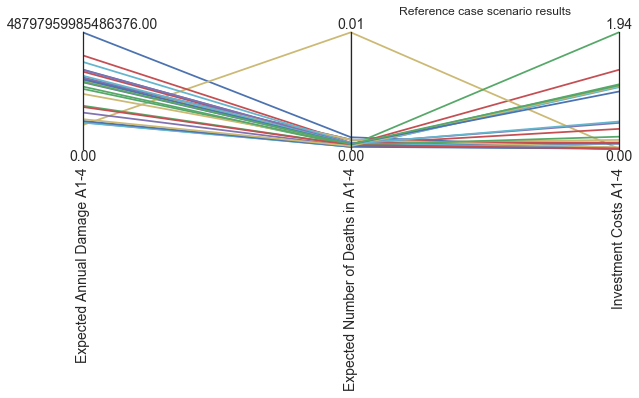

In [18]:
# The signal-to-noise metrics are also plotted to show the trade-offs between the outcomes of interest
from ema_workbench.analysis import parcoords

refcase_data = scores
refcase_limits = parcoords.get_limits(refcase_data)
refcase_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(refcase_limits)
paraxes.plot(refcase_data)
plt.title('Reference case scenario results')

# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [21]:
# With 'regret' the outcomes of interest for the various scenarios are compared
# to the scenario that provides the most preferred outcomes
experiments, outcomes = results_reevaluation_gelderland_refcase

refcase_regret = {}
refcase_max_regret = {}
for outcome in model.outcomes:
    policy_column = experiments['policy']
    
    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name], 
                         "policy":experiments['policy'],
                         "scenario_id":experiments['scenario_id']})
    
    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario_id', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)
   
    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    
    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    
    outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()
   
    refcase_regret[outcome.name] = refcase_regret
    refcase_max_regret[outcome.name] = outcome_regret.max()

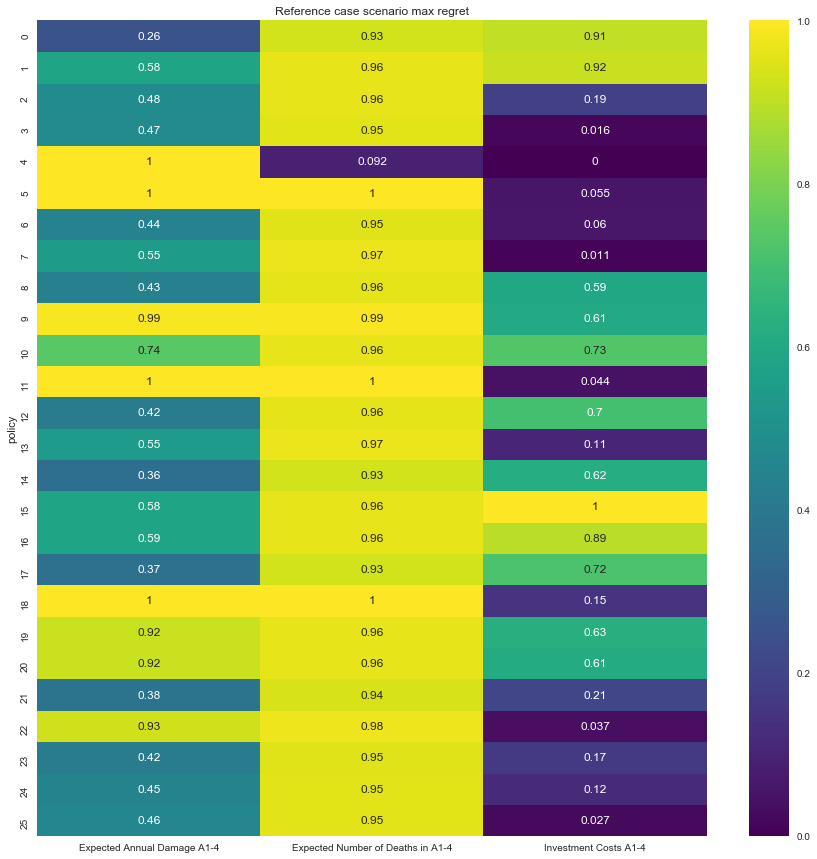

In [25]:
# The regret for each outcome of interest is shown for each solution, scored from 0-1. This is plotted, using a heatmap
refcase_max_regret = pd.DataFrame.from_dict(refcase_max_regret)
refcase_max_regret = pd.DataFrame(refcase_max_regret.iloc[:,0:3])

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(refcase_max_regret/refcase_max_regret.max(), cmap='viridis', annot=True)
plt.title('Reference case scenario max regret')

plt.show()

# When only one solution comes forward, this part of code generates an error, since no comparison can be made

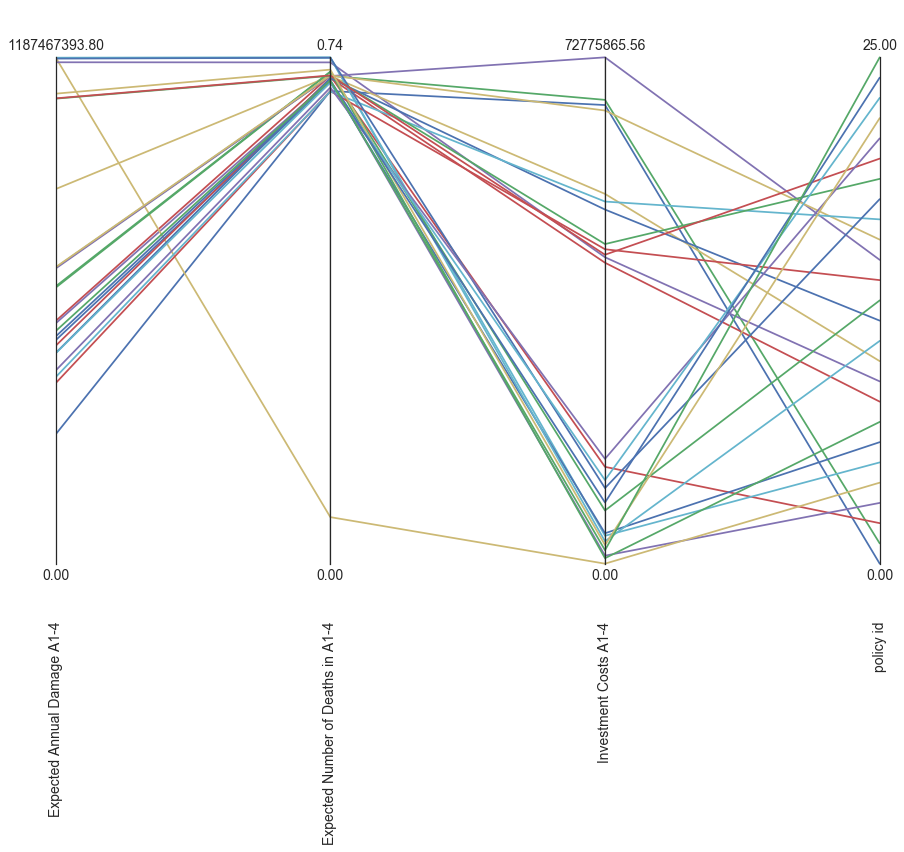

In [26]:
# In order to identify which policy belongs to which regret-trade-off line, the policy ID's are added to the parcoords plot
ref_data = refcase_max_regret

ref_data['policy id'] = ref_data.index.astype("float64")

ref_limits = parcoords.get_limits(ref_data)
ref_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(ref_limits)
paraxes.plot(ref_data)

# Set figure size:
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()